C:\Users\imrkm\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Sparsity with L1 penalty: 76.98%
Test score with L1 penalty: 0.8326
Example run in 67.853 s


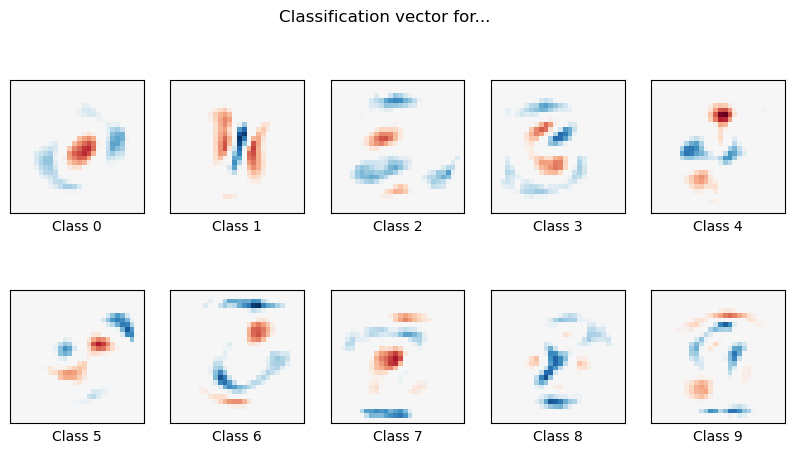

Enter path to an image file (or 'exit' to quit): "C:\Users\imrkm\OneDrive\Pictures\Screenshots\certificate AI.png"
An error occurred: [Errno 22] Invalid argument: '"C:\\Users\\imrkm\\OneDrive\\Pictures\\Screenshots\\certificate AI.png"'
Enter path to an image file (or 'exit' to quit): C:\Users\imrkm\OneDrive\Pictures\Screenshots\certificate AI.png
An error occurred: Image must be 28x28 pixels.


In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

def get_prediction(clf, scaler):
    while True:
        try:
            input_image = input("Enter path to an image file (or 'exit' to quit): ")
            if input_image.lower() == "exit":
                break
            image = plt.imread(input_image)
            if image.shape != (28, 28):
                raise ValueError("Image must be 28x28 pixels.")
            image = image.flatten()
            image = scaler.transform([image])
            prediction = clf.predict(image)[0]
            print(f"The predicted digit is: {prediction}")
            plot_digit(clf.coef_, prediction)
        except Exception as e:
            print(f"An error occurred: {e}")

# Your existing code goes here...

# Modify this part to include the output function
get_prediction(clf, scaler)